# We can remove 17 columns at the Beginning!!

<h2> As the data in this challenge is highly dimensional, we can reduce the column dimension by eliminating less useful columns.After complete EDA process,17 columns can be selected which we can remove just after loading the data sets.</h2>

<h3> Criteria used : </h3>
<h4>
1.Selected mostly-missing feaures which have more than 99% of missing values.
  
2.Selected too-skewed features whose majority categories cover more than 99% of occurences.
  
3.Selected hightly-correlated features. Tested correlations between columns, picked up pairs whose corr is greater than 0.99, compared the distribution of the features in the pairs and corr with HasDetections, and selected the minor column for elimination.</h4>

## Various Required Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

### Utility function (learnt from a kaggle kernel for  reducing memory usage by converting data types of features )

In [14]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

### Defining data types for large datasets is highly recommended for reducing memory usage! (learnt from a kaggle kernel)

In [15]:
datatypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

## Function for enabling Plotly notebook mode with google colaboratory

In [16]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [17]:
"""configure_plotly_browser_state() can be executed before running every cell by using IPython's pre_run_cell hook"""

import IPython

IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

<h2>Loading the Data set</h2>

In [18]:
data = pd.read_csv('/content/kaggle/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"',dtype=datatypes)

In [19]:
train_data = data.copy()

In [20]:
train_data = reduce_mem_usage(train_data)

Mem. usage decreased to 1673.25 Mb (0.0% reduction)


<h1>Feature Engineering:</h1>
    <h3>1.Mostly-missing features </h3>
    <h3>2.Too-skewed features </h3>
    <h3>3.Hightly-correlated features </h3>

<h2>1.Mostly-missing features </h2>


In [21]:
(train_data.isnull().sum()*100/train_data.shape[0]).sort_values(ascending=False)

PuaMode                                              99.974119
Census_ProcessorClass                                99.589407
DefaultBrowsersIdentifier                            95.141637
Census_IsFlightingInternal                           83.044030
Census_InternalBatteryType                           71.046809
Census_ThresholdOptIn                                63.524472
Census_IsWIMBootEnabled                              63.439038
SmartScreen                                          35.610795
OrganizationIdentifier                               30.841487
SMode                                                 6.027686
CityIdentifier                                        3.647477
Wdft_IsGamer                                          3.401352
Wdft_RegionIdentifier                                 3.401352
Census_InternalBatteryNumberOfCharges                 3.012448
Census_FirmwareManufacturerIdentifier                 2.054109
Census_IsFlightsDisabled                              1

In [22]:
drop_features = []
drop_features.append('PuaMode')
drop_features.append('Census_ProcessorClass')

<h2>2.Too-skewed features </h2>

In [23]:
sk_df = pd.DataFrame([{'column': c, 'unique': train_data[c].nunique(), 'skewness': train_data[c].value_counts(normalize=True).values[0] * 100} for c in train_data.columns])
sk_df = sk_df.sort_values('skewness',ascending=False)
sk_df.head(10)

column   skewness  unique
75           Census_IsWIMBootEnabled  99.999969       2
5                             IsBeta  99.999249       2
69          Census_IsFlightsDisabled  99.998996       2
68        Census_IsFlightingInternal  99.998612       2
27                   AutoSampleOptIn  99.997108       2
71             Census_ThresholdOptIn  99.974924       2
29                             SMode  99.953708       2
65  Census_IsPortableOperatingSystem  99.945480       2
28                           PuaMode  99.913382       2
35               Census_DeviceFamily  99.838256       3

In [24]:
drop_features.extend(sk_df[sk_df.skewness > 99].column.tolist())
drop_features

['PuaMode',
 'Census_ProcessorClass',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice']

In [25]:
''' Since feature PUAMODE has two occurrences in the list,so remove one '''
drop_features.remove('PuaMode')
drop_features

['Census_ProcessorClass',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice']

In [26]:
train_data.drop(drop_features,axis=1,inplace=True)
train_data.shape

(8921483, 70)

##  Filling missing Values

In [27]:
# Nan Values
null_counts = train_data.isnull().sum()
null_counts = null_counts / train_data.shape[0]
null_counts[null_counts > 0.1]

DefaultBrowsersIdentifier     0.951416
OrganizationIdentifier        0.308415
SmartScreen                   0.356108
Census_InternalBatteryType    0.710468
dtype: float64

In [28]:
train_data.DefaultBrowsersIdentifier.fillna(0, inplace=True)

In [29]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
train_data.replace({'SmartScreen': trans_dict}, inplace=True)

In [30]:
train_data.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [31]:
train_data.Census_InternalBatteryType.value_counts()[:5]

lion    2028256
li-i     245617
#        183998
lip       62099
liio      32635
Name: Census_InternalBatteryType, dtype: int64

In [32]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train_data.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [33]:
train_data.dropna(inplace=True)
train_data.shape

(7667789, 70)

In [34]:
train_data.drop('MachineIdentifier', axis=1, inplace=True)

In [35]:
train_data['SmartScreen'] = train_data.SmartScreen.astype('category')
train_data['Census_InternalBatteryType'] = train_data.Census_InternalBatteryType.astype('category')
cate_cols = train_data.select_dtypes(include='category').columns.tolist()
cate_cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cate_cols:
    train_data[col] = le.fit_transform(train_data[col])

In [37]:
train_data = reduce_mem_usage(train_data)

Mem. usage decreased to 957.95 Mb (58.0% reduction)


## 3. Highly Correlated Features

In [38]:
cols = train_data.columns.tolist()

In [39]:
corr_remove = []

### Calculating Correlation between columns in small batches

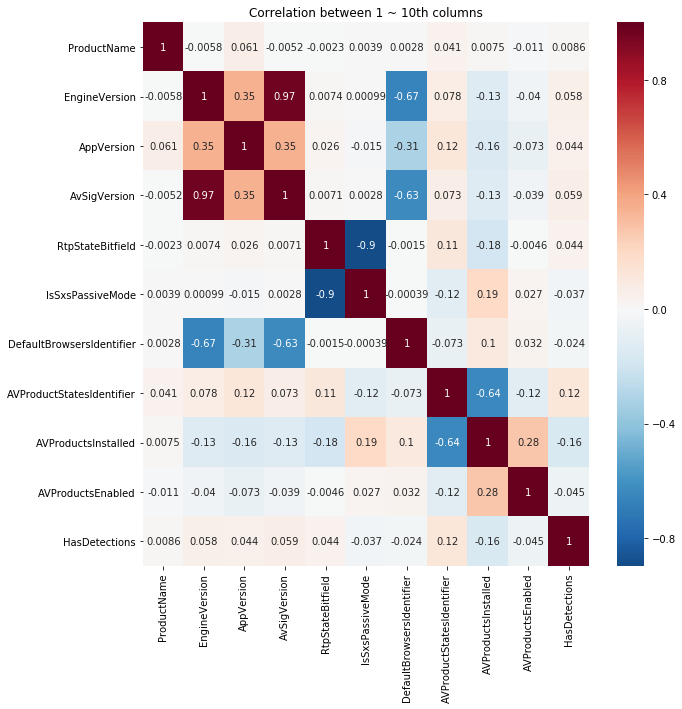

In [40]:
plt.figure(figsize=(10,10))
co_cols = cols[:10]
co_cols.append('HasDetections')
sns.heatmap(train_data[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 1 ~ 10th columns')
plt.show()

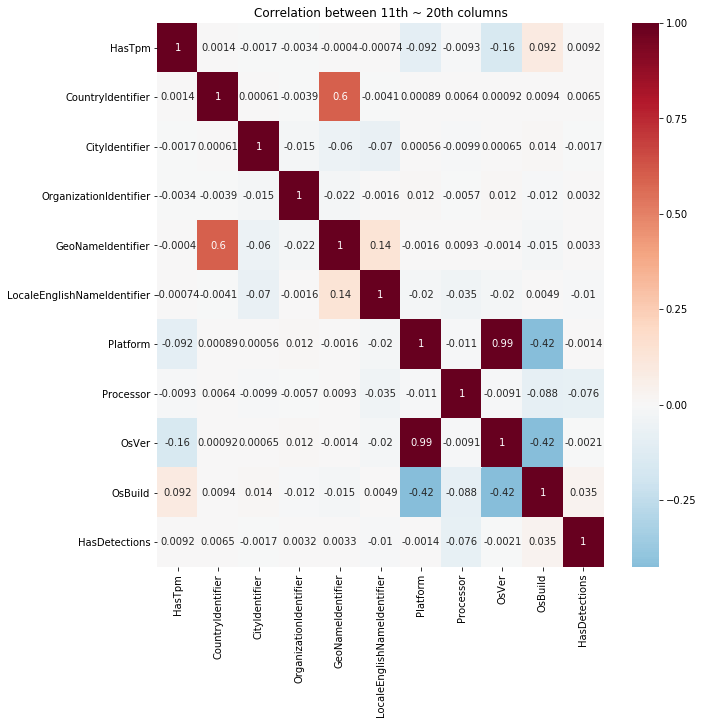

In [41]:
plt.figure(figsize=(10,10))
co_cols = cols[10:20]
co_cols.append('HasDetections')
sns.heatmap(train_data[co_cols].corr(),cmap='RdBu_r',annot=True,center=0.0)
plt.title('Correlation between 11th ~ 20th columns')
plt.show()

In [42]:
"""Compare and choose the feature with less unique value for removing"""
print(train_data.OsVer.nunique())

print(train_data.Platform.nunique())

45
3


In [43]:
corr_remove.append('Platform')

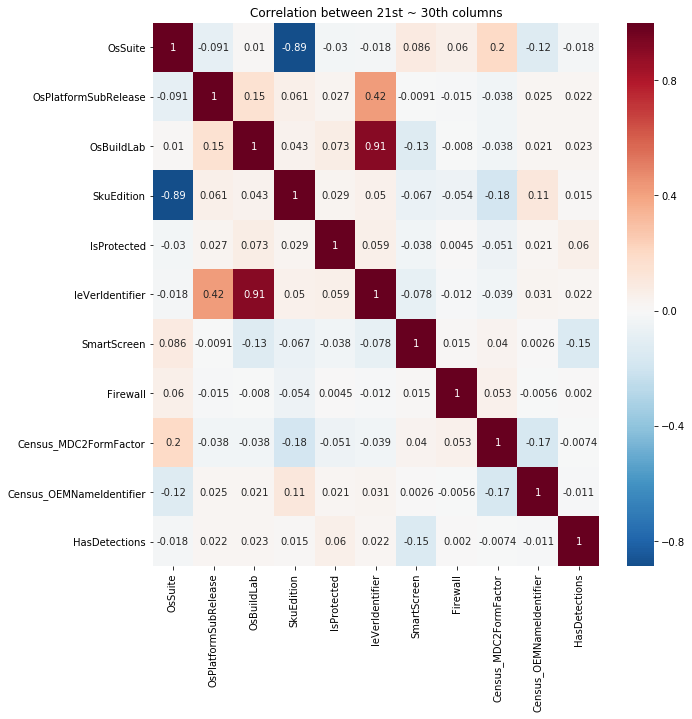

In [44]:
plt.figure(figsize=(10,10))
co_cols = cols[20:30]
co_cols.append('HasDetections')
sns.heatmap(train_data[co_cols].corr(),cmap='RdBu_r',annot=True,center=0.0)
plt.title('Correlation between 21st ~ 30th columns')
plt.show()

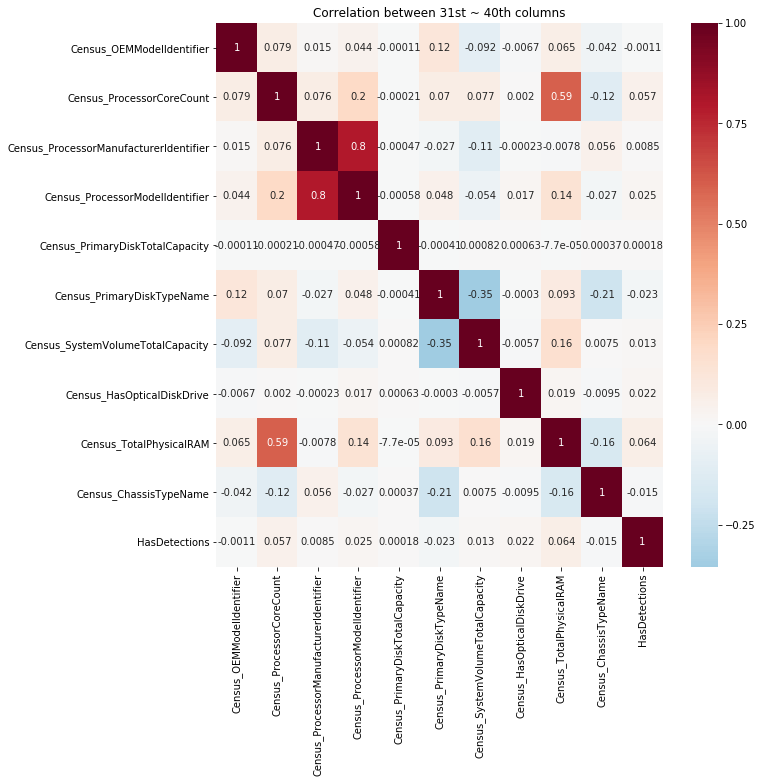

In [45]:
plt.figure(figsize=(10,10))
co_cols = cols[30:40]
co_cols.append('HasDetections')
sns.heatmap(train_data[co_cols].corr(),cmap='RdBu_r',annot=True,center=0.0)
plt.title('Correlation between 31st ~ 40th columns')
plt.show()

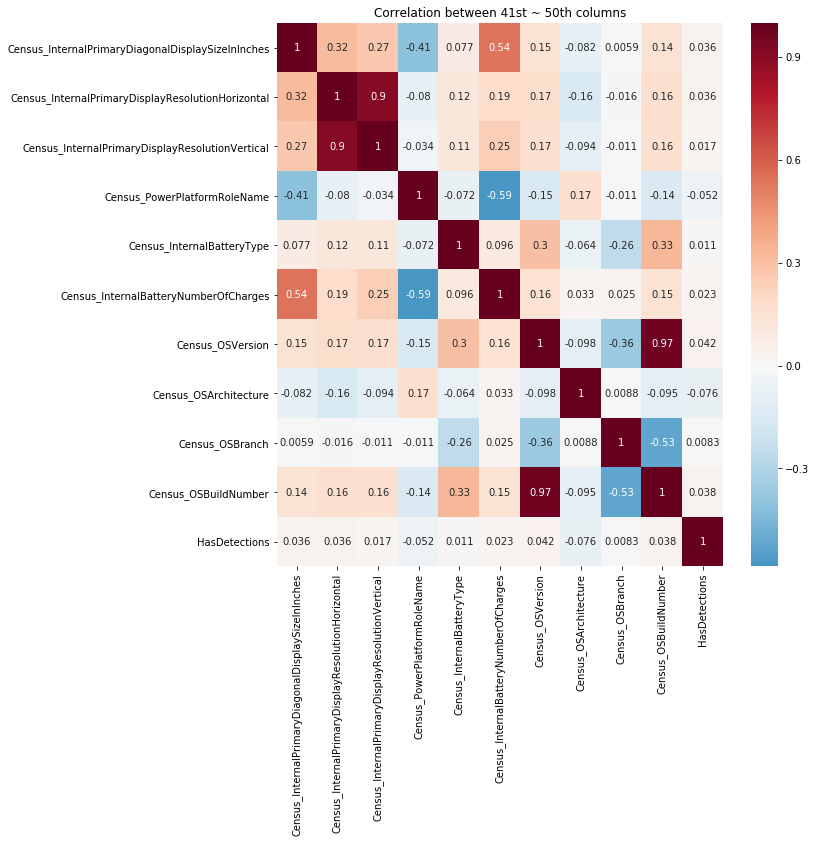

In [46]:
plt.figure(figsize=(10,10))
co_cols = cols[40:50]
co_cols.append('HasDetections')
sns.heatmap(train_data[co_cols].corr(),cmap='RdBu_r',annot=True,center=0.0)
plt.title('Correlation between 41st ~ 50th columns')
plt.show()

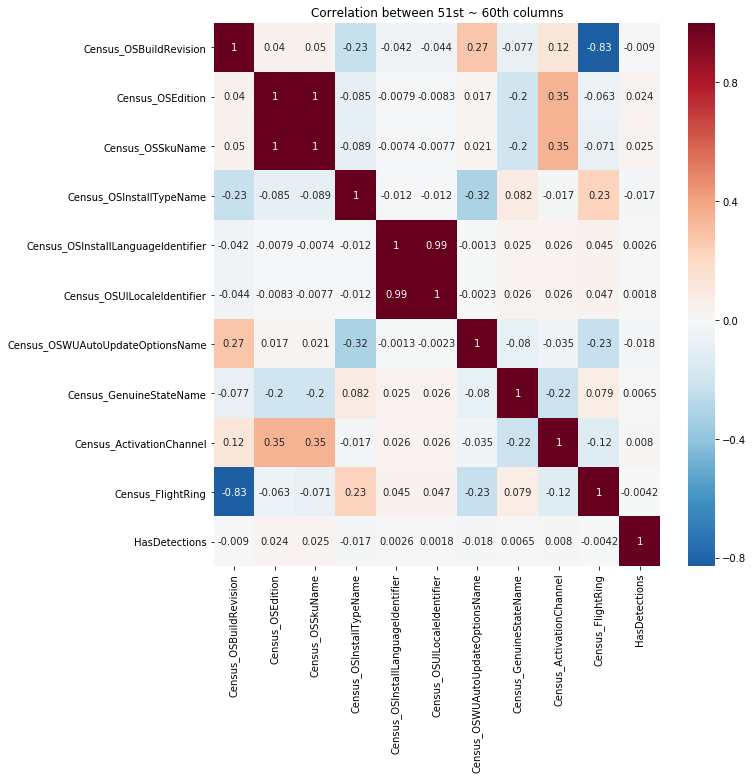

In [47]:
plt.figure(figsize=(10,10))
co_cols = cols[50:60]
co_cols.append('HasDetections')
sns.heatmap(train_data[co_cols].corr(),cmap='RdBu_r',annot=True,center=0.0)
plt.title('Correlation between 51st ~ 60th columns')
plt.show()

In [48]:
print(train_data.Census_OSEdition.nunique())
print(train_data.Census_OSSkuName.nunique(), '\n')
print(train_data.Census_OSInstallLanguageIdentifier.nunique())
print(train_data.Census_OSUILocaleIdentifier.nunique())

29
25 

39
144


In [49]:
corr_remove.append('Census_OSSkuName')
corr_remove.append('Census_OSInstallLanguageIdentifier')

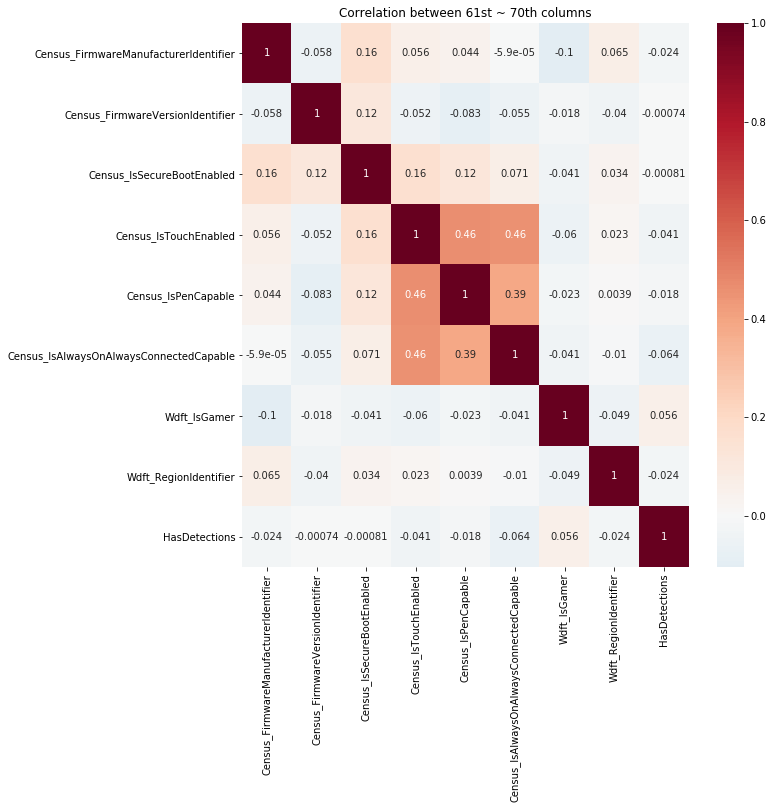

In [50]:
plt.figure(figsize=(10,10))
co_cols = cols[60:70]
sns.heatmap(train_data[co_cols].corr(),cmap='RdBu_r',annot=True,center=0.0)
plt.title('Correlation between 61st ~ 70th columns')
plt.show()

In [51]:
train_data.drop(corr_remove,axis=1,inplace=True)
train_data.shape

(7667789, 66)

## Now, finding cross-group correlated features

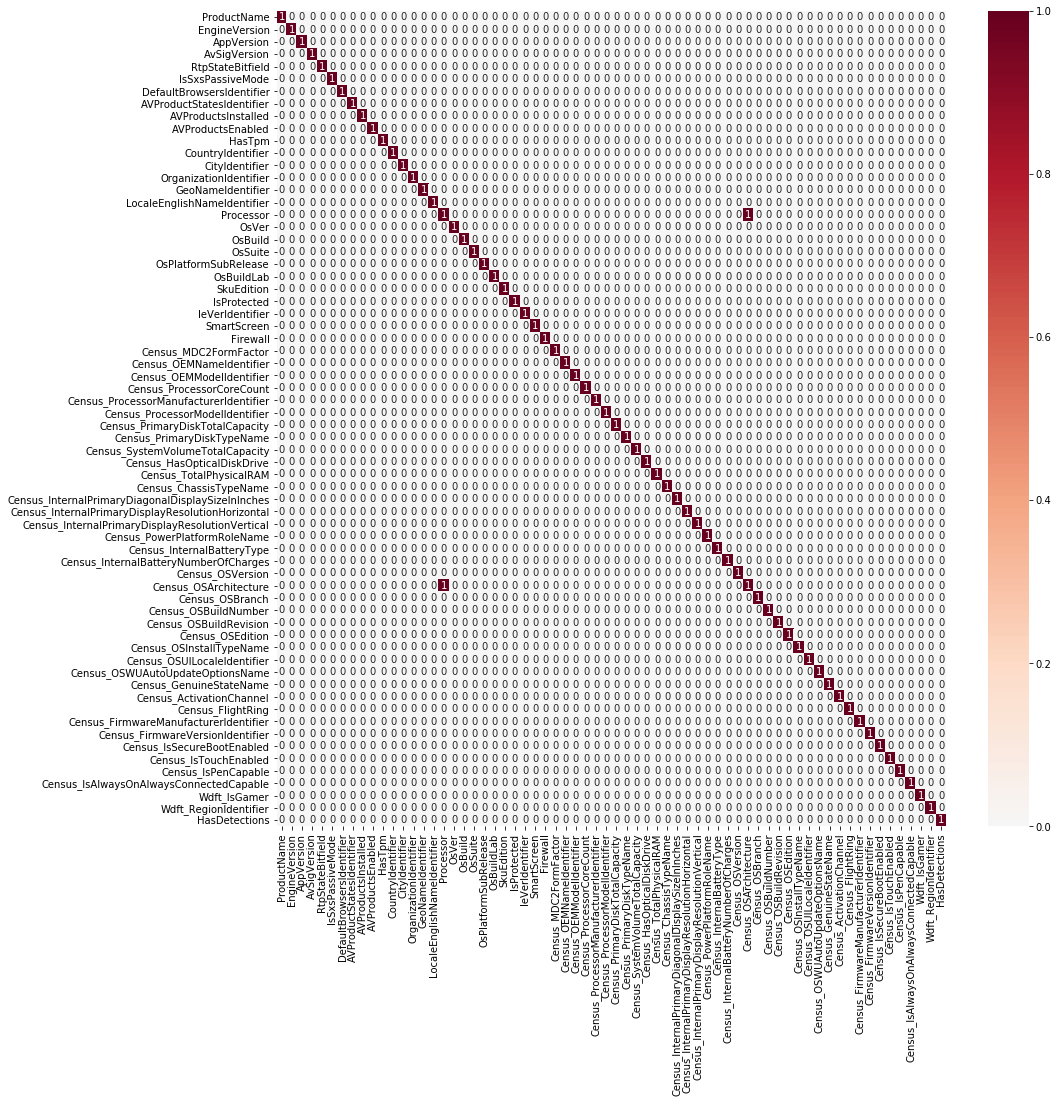

In [52]:
corr = train_data.corr()
high_corr = (corr >= 0.99).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [53]:
print(train_data.Census_OSArchitecture.nunique())
print(train_data.Processor.nunique())

3
3


In [54]:
'''Here both have same number of unique values,we will check coorelation with Target variable and then remove'''
target_corr = train_data[['Census_OSArchitecture','Processor','HasDetections']].corr()
target_corr

Census_OSArchitecture  Processor  HasDetections
Census_OSArchitecture               1.000000   0.995081      -0.075764
Processor                           0.995081   1.000000      -0.075787
HasDetections                      -0.075764  -0.075787       1.000000

In [55]:
"""Since both have identical correlation here as well,remove any of them"""
corr_remove.append('Processor')
train_data.drop('Processor',axis=1,inplace=True)

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667789 entries, 0 to 8921482
Data columns (total 65 columns):
ProductName                                          int8
EngineVersion                                        int8
AppVersion                                           int8
AvSigVersion                                         int16
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
DefaultBrowsersIdentifier                            float16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                                       float32
OrganizationIdentifier                               float16
GeoNameIdentifier                                   

In [57]:
stats = []
for col in train_data.columns:
    stats.append((col, train_data[col].nunique(), train_data[col].isnull().sum() * 100 / train_data.shape[0], train_data[col].value_counts(normalize=True, dropna=False).values[0] * 100, train_data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Unique_values', ascending=False).head()


Feature  ...     type
34       Census_SystemVolumeTotalCapacity  ...  float32
28              Census_OEMModelIdentifier  ...  float32
12                         CityIdentifier  ...  float32
57       Census_FirmwareVersionIdentifier  ...  float32
43  Census_InternalBatteryNumberOfCharges  ...  float32

[5 rows x 5 columns]

In [58]:
new_cols = train_data.columns.tolist()
len(new_cols)

65

## Thus,17 columns can be removed at the beginning based on our EDA process.